In [83]:
import pandas as pd
cars = pd.read_csv("/content/drive/MyDrive/Programming/Datasets/car_price_prediction.csv")

# Look at the Big Picture
Use the car price data to build a model of car prices

## Overview the data

In [84]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [85]:
cars.rename(columns={
    "Prod. year": "Prod_Year",
    "Leather interior": "Leather_Interior",
    "Fuel type": "Fuel_Type",
    "Engine volume": "Engine_Volume",
    "Gear box type": "Gear_Box_Type",
    "Drive wheels": "Drive_Wheels"
}, inplace=True)

In [86]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod_Year         19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather_Interior  19237 non-null  object 
 8   Fuel_Type         19237 non-null  object 
 9   Engine_Volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear_Box_Type     19237 non-null  object 
 13  Drive_Wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Clean the data

#### Drop uninformative identifiers, and convert to usable types

In [87]:
"""
    notice too many missing values
    => drop it
"""
cars.Levy.value_counts()

,count
Levy,
-,5819
765,486
891,461
639,410
640,405
...,...
2308,1
4860,1
1641,1


In [88]:
cars.ID.value_counts() # too discrete, drop it

,count
ID,
45815365,8
45815361,8
45815368,7
45815363,7
45723475,7
...,...
45773011,1
45774019,1
45791449,1


In [89]:
cars.Manufacturer.value_counts()

,count
Manufacturer,
HYUNDAI,3769
TOYOTA,3662
MERCEDES-BENZ,2076
FORD,1111
CHEVROLET,1069
...,...
LAMBORGHINI,1
PONTIAC,1
SATURN,1


In [90]:
cars.Model.value_counts()

,count
Model,
Prius,1083
Sonata,1079
Camry,938
Elantra,922
E 350,542
...,...
530 i,1
E 500 AVG,1
Vito Extralong,1


In [91]:
cars.Gear_Box_Type.value_counts()

,count
Gear_Box_Type,
Automatic,13514
Tiptronic,3102
Manual,1875
Variator,746


In [92]:
cars.Drive_Wheels.value_counts()

,count
Drive_Wheels,
Front,12874
4x4,4058
Rear,2305


In [93]:
cars.Doors.value_counts()

,count
Doors,
04-May,18332
02-Mar,777
>5,128


In [94]:
cars.Wheel.value_counts()

,count
Wheel,
Left wheel,17753
Right-hand drive,1484


In [95]:
cars.Color.value_counts()

,count
Color,
Black,5033
White,4489
Silver,3792
Grey,2375
Blue,1396
Red,639
Green,322
Orange,253
Brown,187


In [96]:
cars.drop(["Levy", "ID"], axis=1, inplace=True)

In [97]:
cars.Engine_Volume.value_counts()

,count
Engine_Volume,
2,3916
2.5,2277
1.8,1760
1.6,1462
1.5,1321
...,...
5.4 Turbo,1
0.3 Turbo,1
5.2,1


In [98]:
cars.loc[:, "Leather_Interior"] = cars.loc[:, "Leather_Interior"].replace({'Yes': 1, 'No': 0})

<ipython-input-98-df7d8a9be706>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars.loc[:, "Leather_Interior"] = cars.loc[:, "Leather_Interior"].replace({'Yes': 1, 'No': 0})


In [99]:
# Convert Mileage to int
cars.Mileage = cars.Mileage.str.replace(" km", "").astype("int64")

In [100]:
# Convert Cylinders to int
cars.loc[:, "Cylinders"] = cars.loc[:, "Cylinders"].astype("int64")

#### Overview the distributions

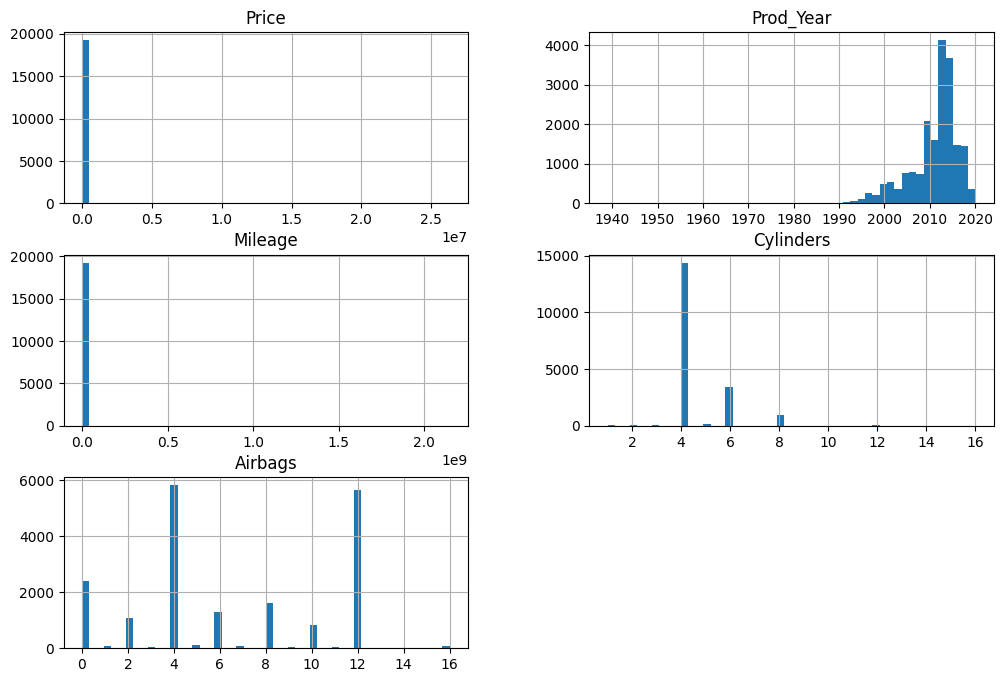

In [101]:
import matplotlib.pyplot as plt
cars.hist(bins=50, figsize=(12,8))
plt.show()
# Notice Price and Mileage is way too skewed

#### Clean the outliers of Price

In [102]:
# Price is dramatically skewed => Use IQR to clean up the outliers
Q1 = cars['Price'].quantile(0.25)
Q3 = cars['Price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

cars = cars[(cars['Price'] >= lower) & (cars['Price'] <= upper)]

<Axes: >

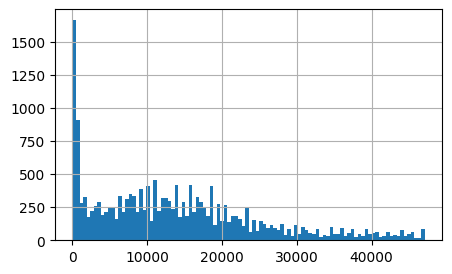

In [103]:
cars.Price.hist(bins=100, figsize=(5,3))
# Way better

In [104]:
len(cars.Price[cars.Price <= 500])
# very unreasonable prizes but still stand 1/10 of the data

1665

In [105]:
cars = cars[cars['Price'] > 500]

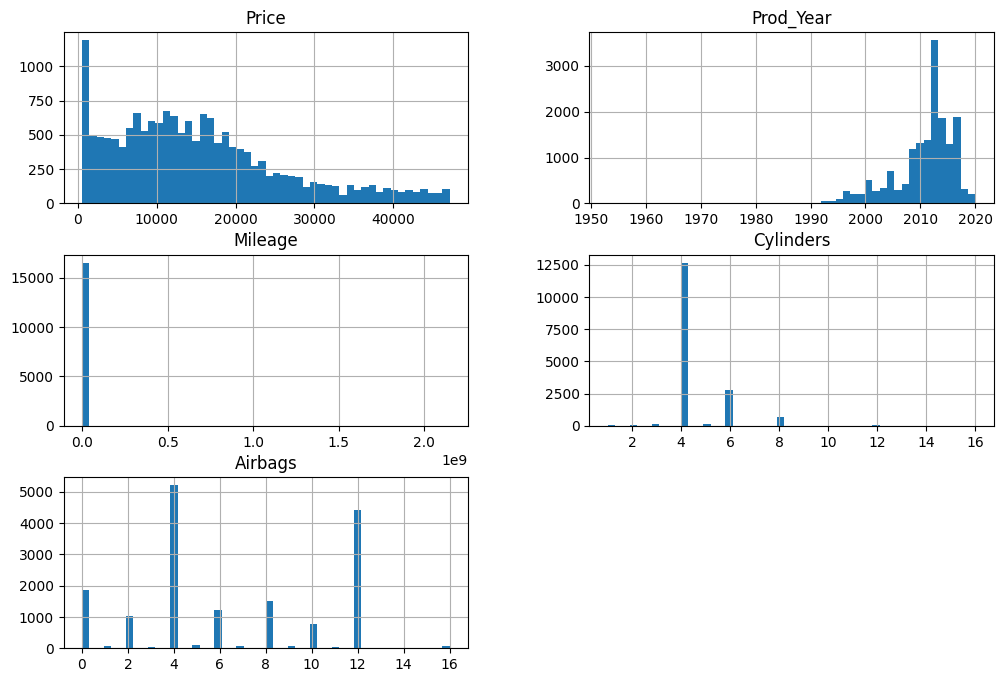

In [106]:
cars.hist(bins=50, figsize=(12,8))
plt.show()
# Way way way better

In [107]:
# One last check
cars.Price.describe()
# much more resonable

,Price
count,16499.000000
mean,15414.260258
std,11020.755654
min,549.000000
25%,7213.000000
50%,13485.000000
75%,21103.000000
max,47120.000000


#### Clean up outliers from Mileage

In [108]:
cars.Mileage.describe()

,Mileage
count,1.649900e+04
mean,1.566371e+06
std,4.876129e+07
min,0.000000e+00
25%,7.401450e+04
50%,1.282020e+05
75%,1.881940e+05
max,2.147484e+09


In [109]:
cars[cars['Mileage'] == 0] # check new cars or data error

,Price,Manufacturer,Model,Prod_Year,Category,Leather_Interior,Fuel_Type,Engine_Volume,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,Doors,Wheel,Color,Airbags
11,8781,FORD,Transit,1999,Microbus,0,CNG,4,0,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
24,4704,OPEL,Vectra,1995,Sedan,0,Petrol,1.8,0,4.0,Automatic,Front,04-May,Left wheel,Green,4
26,549,LEXUS,GX 470,2008,Jeep,1,Petrol,4.7,0,8.0,Automatic,4x4,04-May,Left wheel,White,0
83,8154,HONDA,Cr-v,1998,Jeep,0,Petrol,2,0,4.0,Automatic,4x4,04-May,Right-hand drive,White,2
97,4234,HONDA,Civic,1997,Hatchback,1,Petrol,1.4,0,4.0,Manual,Front,02-Mar,Left wheel,Blue,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19043,5959,BMW,318,1997,Sedan,0,Petrol,1.8,0,4.0,Manual,Rear,04-May,Left wheel,Silver,2
19047,941,TOYOTA,Prius,2014,Hatchback,1,Hybrid,1.8,0,4.0,Automatic,Front,04-May,Left wheel,Grey,12
19064,2900,BMW,320,1994,Sedan,1,Petrol,2,0,6.0,Manual,Rear,04-May,Left wheel,Green,2
19088,2200,PEUGEOT,406,2001,Sedan,0,Petrol,2,0,4.0,Manual,Front,04-May,Left wheel,White,2


In [110]:
cars = cars[cars['Mileage'] <= 1_000_000]
cars.Mileage.describe()

,Mileage
count,16429.000000
mean,142146.970601
std,102551.993740
min,0.000000
25%,74000.000000
50%,128000.000000
75%,187000.000000
max,999999.000000


<Axes: >

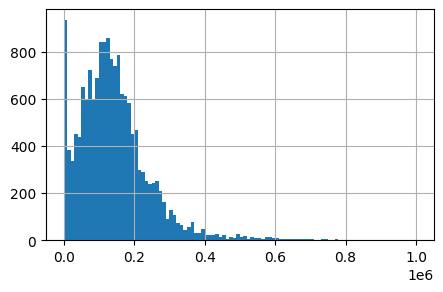

In [111]:
cars.Mileage.hist(bins=100, figsize=(5,3))

#### Clean up Prod_year

In [112]:
year_threshold = 1990
cars = cars[cars['Prod_Year'] >= year_threshold]

#### Convert some other types

In [113]:
# Convert Engine_Volume to a more usable type
cars['Engine_Volume_Clean'] = cars['Engine_Volume'].str.replace(',', '.', regex=False).str.strip()
cars['Engine_Liters'] = cars['Engine_Volume_Clean'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
cars['Turbo'] = cars['Engine_Volume_Clean'].str.contains('Turbo', case=False).astype(int)
cars[['Engine_Volume', 'Engine_Volume_Clean', 'Engine_Liters', 'Turbo']].head(10)

<ipython-input-113-186ebfd289d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Engine_Volume_Clean'] = cars['Engine_Volume'].str.replace(',', '.', regex=False).str.strip()


,Engine_Volume,Engine_Volume_Clean,Engine_Liters,Turbo
0,3.5,3.5,3.5,0
1,3,3,3.0,0
2,1.3,1.3,1.3,0
3,2.5,2.5,2.5,0
4,1.3,1.3,1.3,0
5,2,2,2.0,0
6,1.8,1.8,1.8,0
7,2.4,2.4,2.4,0
8,2.5,2.5,2.5,0
9,3.5,3.5,3.5,0


In [114]:
# Can drop Engine_Volume since it's no longer needed
cars.drop(columns=['Engine_Volume', 'Engine_Volume_Clean'], inplace=True)

In [115]:
cars['Doors'] = cars['Doors'].replace({
    '04-May': 4,
    '02-Mar': 2,
    '>5': 6
}).astype("int64")

<ipython-input-115-b998248e07ab>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['Doors'] = cars['Doors'].replace({


In [116]:
# Change Prod_Year to Age instead
from datetime import datetime

current_year = datetime.now().year
cars.loc[:, 'Age'] = current_year - cars.loc[:, 'Prod_Year']
cars.drop(columns='Prod_Year', inplace=True)

## Last Overview

In [117]:
# move numeric values to the left and others to the right
# get list of numeric and non-numeric column names
numeric_cols = cars.select_dtypes(include=['number', 'bool']).columns.tolist()
non_numeric_cols = cars.select_dtypes(exclude=['number', 'bool']).columns.tolist()

# combine the two DataFrames
cars = cars[numeric_cols + non_numeric_cols]

In [118]:
cars.head()

,Price,Mileage,Cylinders,Doors,Airbags,Engine_Liters,Turbo,Age,Manufacturer,Model,Category,Leather_Interior,Fuel_Type,Gear_Box_Type,Drive_Wheels,Wheel,Color
0,13328,186005,6.0,4,12,3.5,0,15,LEXUS,RX 450,Jeep,1,Hybrid,Automatic,4x4,Left wheel,Silver
1,16621,192000,6.0,4,8,3.0,0,14,CHEVROLET,Equinox,Jeep,0,Petrol,Tiptronic,4x4,Left wheel,Black
2,8467,200000,4.0,4,2,1.3,0,19,HONDA,FIT,Hatchback,0,Petrol,Variator,Front,Right-hand drive,Black
3,3607,168966,4.0,4,0,2.5,0,14,FORD,Escape,Jeep,1,Hybrid,Automatic,4x4,Left wheel,White
4,11726,91901,4.0,4,4,1.3,0,11,HONDA,FIT,Hatchback,1,Petrol,Automatic,Front,Left wheel,Silver


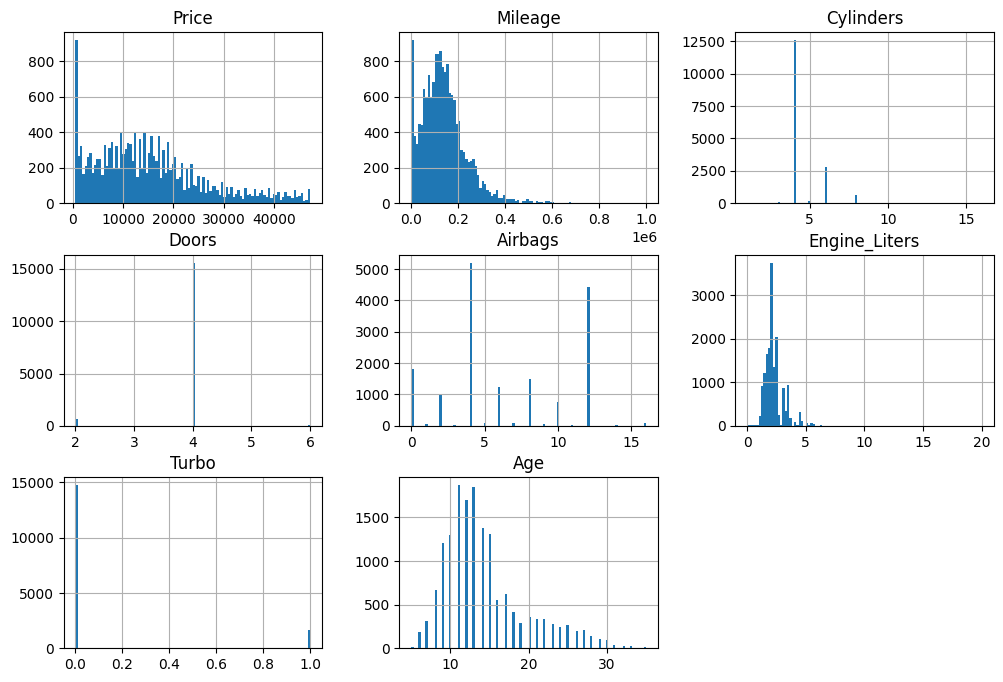

In [119]:
cars.hist(bins=100, figsize=(12,8))
plt.show()

In [120]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16373 entries, 0 to 19235
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             16373 non-null  int64  
 1   Mileage           16373 non-null  int64  
 2   Cylinders         16373 non-null  float64
 3   Doors             16373 non-null  int64  
 4   Airbags           16373 non-null  int64  
 5   Engine_Liters     16373 non-null  float64
 6   Turbo             16373 non-null  int64  
 7   Age               16373 non-null  int64  
 8   Manufacturer      16373 non-null  object 
 9   Model             16373 non-null  object 
 10  Category          16373 non-null  object 
 11  Leather_Interior  16373 non-null  object 
 12  Fuel_Type         16373 non-null  object 
 13  Gear_Box_Type     16373 non-null  object 
 14  Drive_Wheels      16373 non-null  object 
 15  Wheel             16373 non-null  object 
 16  Color             16373 non-null  object 
dty

# Create a Test Set

## Observe the most significant influencer

In [121]:
cars.corr(numeric_only=True)['Price'].sort_values(ascending=False)
# Discover that ages has the most significant influence on prices

,Price
Price,1.000000
Turbo,0.139012
Engine_Liters,0.054183
Doors,0.044935
Cylinders,0.002883
Airbags,-0.049293
Mileage,-0.176217
Age,-0.317615


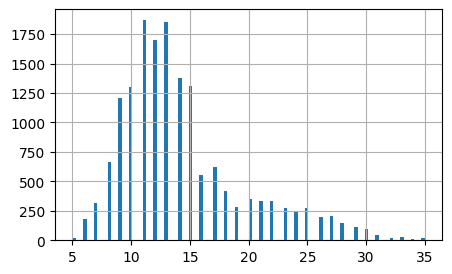

In [122]:
# Look at Age again
cars.Age.hist(bins=100, figsize=(5,3))
plt.show()

In [123]:
cars.Age.describe()

,Age
count,16373.000000
mean,14.302022
std,5.316753
min,5.000000
25%,11.000000
50%,13.000000
75%,16.000000
max,35.000000


## Stratified Shuffle Split
Compare bins=4 and bins=5

<Axes: xlabel='Age_Group_4'>

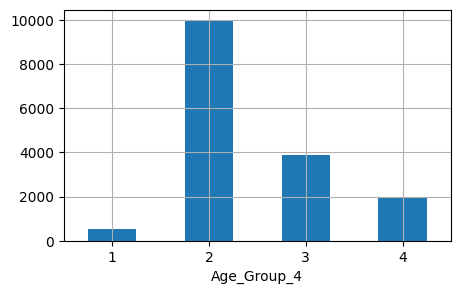

In [124]:
bins_4 = [0, 7, 14, 21, 35]
labels_4 = ['1', '2', '3', '4']

cars['Age_Group_4'] = pd.cut(cars['Age'], bins=bins_4, labels=labels_4, right=True)

cars['Age_Group_4'].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(5,3))

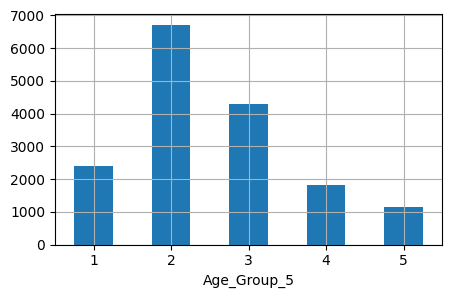

In [125]:
bins_5 = [0, 9, 13, 18, 24, 35]
labels_5 = ['1', '2', '3', '4', '5']

cars['Age_Group_5'] = pd.cut(cars['Age'], bins=bins_5, labels=labels_5, right=True)

cars['Age_Group_5'].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(5,3))

# bins_5 is better
cars.drop("Age_Group_4", axis=1, inplace=True)

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# move numeric values to the left and others to the right
numeric_cols = cars.select_dtypes(include=['number', 'bool']).columns.tolist()
non_numeric_cols = cars.select_dtypes(exclude=['number', 'bool']).columns.tolist()

cars = cars[numeric_cols + non_numeric_cols]

strat_train_set, strat_test_set = train_test_split(
    cars, test_size=0.2, stratify=cars['Age_Group_5'], random_state=42
)

In [127]:
strat_test_set["Age_Group_5"].value_counts() / strat_train_set["Age_Group_5"].value_counts()

,count
Age_Group_5,
2,0.250093
3,0.249927
1,0.249739
4,0.250342
5,0.250273


In [128]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("Age_Group_5", axis=1, inplace=True)

# Explore and Visualize the Data to Gain Insights
Put the strat_test_set aside and just focus on strat_train_set

## Visualization

In [129]:
cars = strat_train_set.copy() # Just need to experiment this
cars.head()

,Price,Mileage,Cylinders,Doors,Airbags,Engine_Liters,Turbo,Age,Manufacturer,Model,Category,Leather_Interior,Fuel_Type,Gear_Box_Type,Drive_Wheels,Wheel,Color
1413,10976,83000,4.0,4,4,1.3,0,18,TOYOTA,Vitz,Sedan,0,Petrol,Automatic,Front,Right-hand drive,Silver
14543,14113,102000,4.0,4,8,1.5,0,13,TOYOTA,Aqua,Sedan,0,Petrol,Automatic,Front,Right-hand drive,Silver
7561,4704,0,4.0,4,2,2.2,0,31,MERCEDES-BENZ,C 220,Sedan,0,CNG,Manual,Rear,Left wheel,Black
8027,36068,112193,4.0,4,4,2.5,0,9,HYUNDAI,H1,Minivan,1,Diesel,Automatic,Front,Left wheel,Silver
3869,19306,82000,4.0,4,4,1.5,0,11,TOYOTA,Aqua,Hatchback,1,Petrol,Automatic,Front,Left wheel,Black


In [130]:
cars.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Turbo,0.142822
Engine_Liters,0.062199
Doors,0.047357
Cylinders,0.010780
Airbags,-0.047154
Mileage,-0.173430
Age,-0.314687


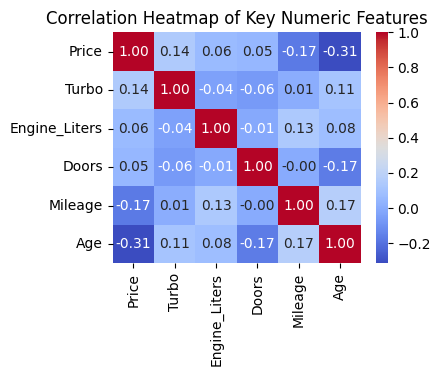

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Just these relatively important features
important_numeric = ['Price', 'Turbo', 'Engine_Liters', 'Doors', 'Mileage', 'Age']

plt.figure(figsize=(4, 3))
sns.heatmap(cars[important_numeric].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()

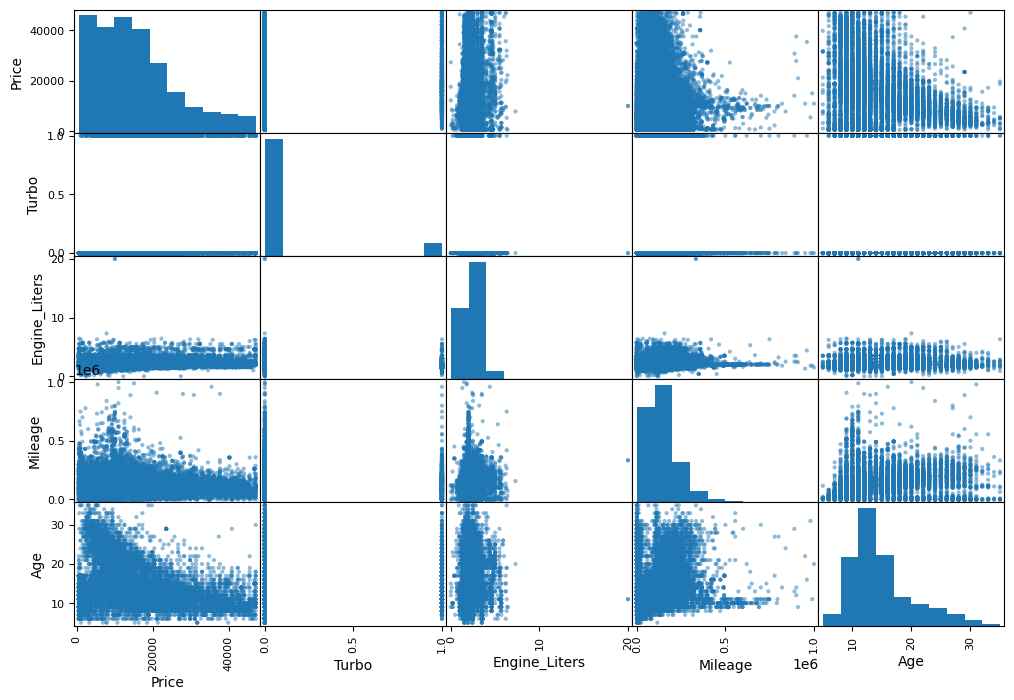

In [132]:
from pandas.plotting import scatter_matrix
attributes = ['Price', 'Turbo', 'Engine_Liters', 'Mileage', 'Age']
scatter_matrix(cars[attributes], figsize=(12,8))
plt.show()

<Axes: xlabel='Age', ylabel='Price'>

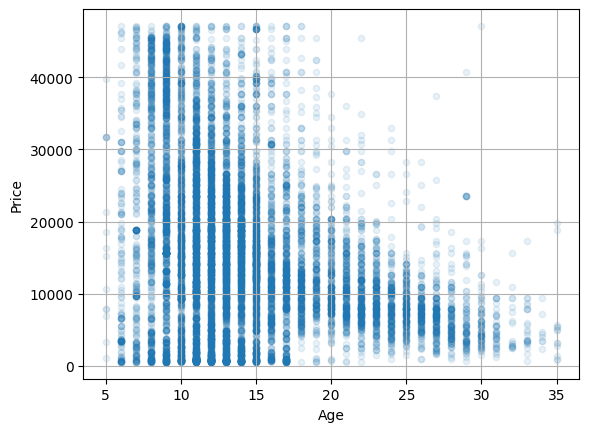

In [133]:
# The correlation between Prize and Age seems to be the most promissing one
cars.plot(kind="scatter", x="Age", y="Price",
          alpha=0.1, grid=True)

In [134]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13098 entries, 1413 to 17245
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13098 non-null  int64  
 1   Mileage           13098 non-null  int64  
 2   Cylinders         13098 non-null  float64
 3   Doors             13098 non-null  int64  
 4   Airbags           13098 non-null  int64  
 5   Engine_Liters     13098 non-null  float64
 6   Turbo             13098 non-null  int64  
 7   Age               13098 non-null  int64  
 8   Manufacturer      13098 non-null  object 
 9   Model             13098 non-null  object 
 10  Category          13098 non-null  object 
 11  Leather_Interior  13098 non-null  object 
 12  Fuel_Type         13098 non-null  object 
 13  Gear_Box_Type     13098 non-null  object 
 14  Drive_Wheels      13098 non-null  object 
 15  Wheel             13098 non-null  object 
 16  Color             13098 non-null  object 


## Experiment with Attribute Combinations

### Engine_Liters + Turbo
Engine size and Turbo may highly affect the prize

In [135]:
# Multiply Engine_Liters with Turbo (1 if False, 2 if True)
cars['Engine_Performance'] = cars['Engine_Liters'] * (cars['Turbo'] + 1)

In [136]:
cars.corr(numeric_only=True)['Price'].sort_values(ascending=False)
# turns out that it's potentially useful

,Price
Price,1.000000
Engine_Performance,0.148589
Turbo,0.142822
Engine_Liters,0.062199
Doors,0.047357
Cylinders,0.010780
Airbags,-0.047154
Mileage,-0.173430
Age,-0.314687


<Axes: xlabel='Engine_Performance', ylabel='Price'>

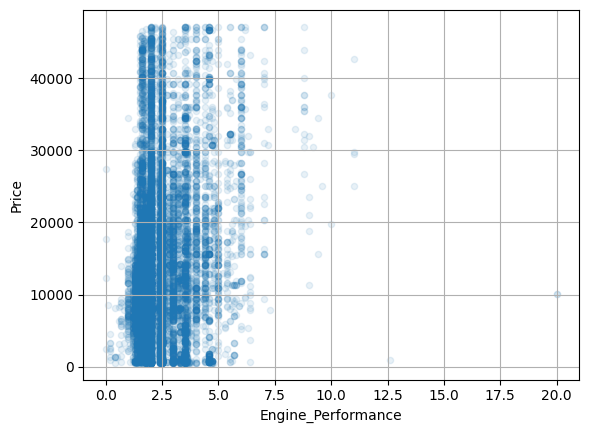

In [137]:
cars.plot(kind="scatter", x="Engine_Performance", y="Price",
          alpha=0.1, grid=True)

# Prepare the Data for Machine Learning Algorithms

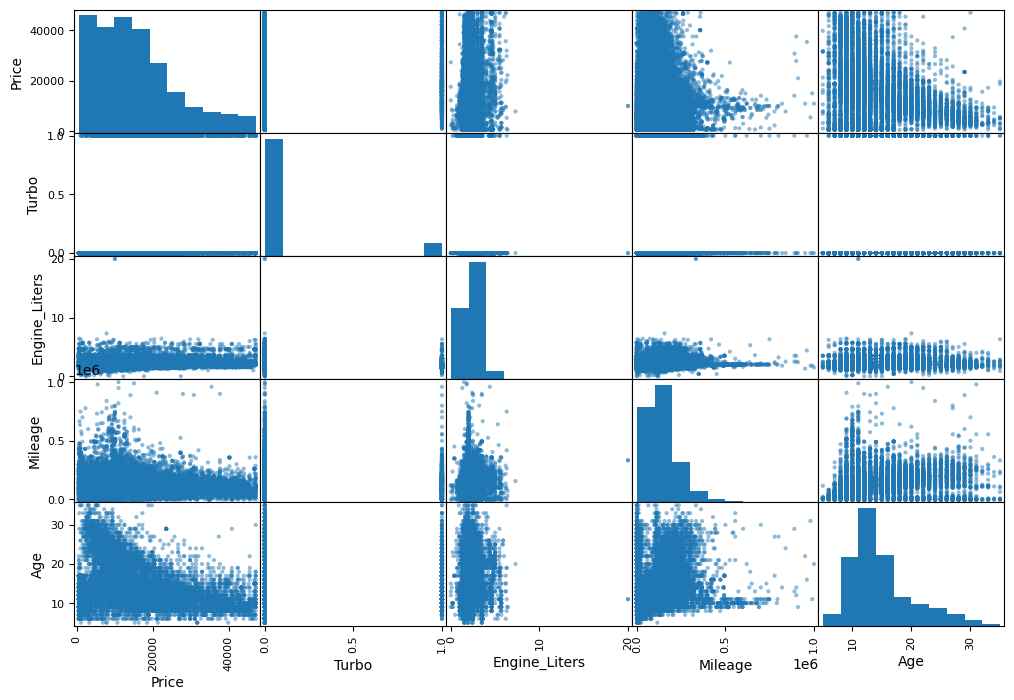

In [138]:
from pandas.plotting import scatter_matrix
attributes = ['Price', 'Turbo', 'Engine_Liters', 'Mileage', 'Age']
scatter_matrix(cars[attributes], figsize=(12,8))
plt.show()

In [139]:
# Separate the predictors and the labels
cars = strat_train_set.drop("Price", axis=1)
cars_labels = strat_train_set["Price"].copy()

## Pipelines

In [140]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13098 entries, 1413 to 17245
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage           13098 non-null  int64  
 1   Cylinders         13098 non-null  float64
 2   Doors             13098 non-null  int64  
 3   Airbags           13098 non-null  int64  
 4   Engine_Liters     13098 non-null  float64
 5   Turbo             13098 non-null  int64  
 6   Age               13098 non-null  int64  
 7   Manufacturer      13098 non-null  object 
 8   Model             13098 non-null  object 
 9   Category          13098 non-null  object 
 10  Leather_Interior  13098 non-null  object 
 11  Fuel_Type         13098 non-null  object 
 12  Gear_Box_Type     13098 non-null  object 
 13  Drive_Wheels      13098 non-null  object 
 14  Wheel             13098 non-null  object 
 15  Color             13098 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory 

In [141]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

numerical_features = ['Mileage', 'Age', 'Engine_Liters']
categorical_features = ['Turbo', 'Leather_Interior']
ratio_features_1 = ['Engine_Liters', 'Cylinders']
ratio_features_2 = ['Doors', 'Airbags']
log_features = ['Mileage', 'Age', 'Engine_Liters']

def column_ratio(X):
    denominator = X[:, [1]]
    denominator[denominator == 0] = np.nan
    result = X[:, [0]] / denominator
    result[np.isinf(result)] = np.nan
    return result

def ratio_name(transformer, feature_names_in):
    return [f"{feature_names_in[0]}_per_{feature_names_in[1]}"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

def log_transform(X):
    # Add a small constant to handle potential zero values
    return np.log(np.where(X <= 0, 1, X))

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(log_transform, feature_names_out="one-to-one"),
    StandardScaler()
)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore')
)

# remaining numerical features for the default pipeline
remaining_numerical = [col for col in numerical_features if col not in ratio_features_1 + ratio_features_2 + log_features]

preprocessing = ColumnTransformer([
    ("engine_per_cylinder", ratio_pipeline(), ratio_features_1),
    ("doors_per_airbag", ratio_pipeline(), ratio_features_2),
    ("log", log_pipeline, log_features),
    ("num", default_num_pipeline, remaining_numerical),
    ("cat", categorical_pipeline, categorical_features)
], remainder='drop') # drop any other columns not specified

final_imputer = SimpleImputer(strategy="median")

In [142]:
cars_prepared = preprocessing.fit_transform(cars)

df_cars_prepared = pd.DataFrame(
    cars_prepared, columns=preprocessing.get_feature_names_out(),
    index=cars.index
)

df_cars_prepared

,engine_per_cylinder__Engine_Liters_per_Cylinders,doors_per_airbag__Doors_per_Airbags,log__Mileage,log__Age,log__Engine_Liters,cat__Turbo_0,cat__Turbo_1,cat__Leather_Interior_0,cat__Leather_Interior_1
1413,-1.163147,0.529225,0.044854,0.844590,-1.492220,1.0,0.0,1.0,0.0
14543,-0.827185,-0.498675,0.134525,-0.096805,-1.059765,1.0,0.0,1.0,0.0
7561,0.348679,2.585023,-4.882431,2.417182,0.097650,1.0,0.0,1.0,0.0
8027,0.852621,0.529225,0.175960,-1.160573,0.483967,1.0,0.0,0.0,1.0
3869,-0.827185,0.529225,0.039581,-0.580065,-1.059765,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14900,-0.827185,-0.498675,-0.856318,-1.887586,-1.059765,0.0,1.0,1.0,0.0
5300,0.012718,2.585023,0.205224,-0.855782,-0.190380,0.0,1.0,1.0,0.0
1119,0.012718,0.529225,0.306886,0.317163,-0.190380,1.0,0.0,0.0,1.0
6063,-0.827185,0.529225,0.172874,-0.580065,-1.059765,1.0,0.0,0.0,1.0


In [143]:
preprocessing.get_feature_names_out()

array(['engine_per_cylinder__Engine_Liters_per_Cylinders',
       'doors_per_airbag__Doors_per_Airbags', 'log__Mileage', 'log__Age',
       'log__Engine_Liters', 'cat__Turbo_0', 'cat__Turbo_1',
       'cat__Leather_Interior_0', 'cat__Leather_Interior_1'], dtype=object)

# Select and Train a Model

In [144]:
cars_labels

,Price
1413,10976
14543,14113
7561,4704
8027,36068
3869,19306
...,...
14900,23991
5300,30420
1119,24709
6063,22502


## Linear Regression

In [145]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13098 entries, 1413 to 17245
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage           13098 non-null  int64  
 1   Cylinders         13098 non-null  float64
 2   Doors             13098 non-null  int64  
 3   Airbags           13098 non-null  int64  
 4   Engine_Liters     13098 non-null  float64
 5   Turbo             13098 non-null  int64  
 6   Age               13098 non-null  int64  
 7   Manufacturer      13098 non-null  object 
 8   Model             13098 non-null  object 
 9   Category          13098 non-null  object 
 10  Leather_Interior  13098 non-null  object 
 11  Fuel_Type         13098 non-null  object 
 12  Gear_Box_Type     13098 non-null  object 
 13  Drive_Wheels      13098 non-null  object 
 14  Wheel             13098 non-null  object 
 15  Color             13098 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory 

In [146]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(
    preprocessing,
    final_imputer,
    LinearRegression()
)
lin_reg.fit(cars, cars_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('engine_per_cylinder',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x799a64ba4040>,
                                                                                       func=<function column_ratio at 0x799a64ba44a0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Engine_...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Turbo',
                                                   'Leather_Interior'])])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('linearregression', LinearRegression())])

In [147]:
cars_predictions = lin_reg.predict(cars)
cars_predictions[:10].round(-2)

array([ 9600., 12400.,  8000., 22100., 16500., 16500., 15400., 13900.,
        5800., 17400.])

In [148]:
cars_labels[:10].values

array([10976, 14113,  4704, 36068, 19306, 15530, 23521, 17158, 10976,
         627])

In [149]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(cars_labels, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(9973.476231916813)

## Decision Tree

In [150]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(
    preprocessing,
    final_imputer,
    DecisionTreeRegressor(random_state=42)
)
tree_reg.fit(cars, cars_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('engine_per_cylinder',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x799a64ba4040>,
                                                                                       func=<function column_ratio at 0x799a64ba44a0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Engine_...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Turbo',
                                                   'Leather_Interior'])])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [151]:
cars_predictions = tree_reg.predict(cars)

In [152]:
tree_mse = mean_squared_error(cars_labels, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(1297.0140262526575)

In [153]:
# Cross Validation
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, cars, cars_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,8375.207095
std,305.284427
min,7816.993595
25%,8260.322903
50%,8335.059027
75%,8543.400161
max,8882.203761


## Random Forest

In [154]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           final_imputer,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, cars, cars_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,6657.267450
std,261.673498
min,6175.745225
25%,6593.264400
50%,6706.827704
75%,6804.666993
max,7013.343433


In [155]:
forest_r2_scores = cross_val_score(forest_reg, cars, cars_labels, scoring="r2", cv=10)

pd.Series(forest_r2_scores).describe()

,0
count,10.000000
mean,0.632676
std,0.027244
min,0.599999
25%,0.607542
50%,0.633369
75%,0.651207
max,0.683652


# Fine-Tune Your Model

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Define the full pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("final_imputer", final_imputer),
    ("random_forest", RandomForestRegressor(random_state=42))
])

# Define the parameter distribution to search
param_distribs = {
    "random_forest__n_estimators": randint(50, 200),
    "random_forest__max_depth": randint(3, 20),
    "random_forest__min_samples_split": randint(2, 10),
    "random_forest__max_features": randint(2, 8),
}

rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_distribs,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search
rnd_search.fit(cars, cars_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('engine_per_cylinder',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x799a64ba4040>,
                                                                                                                    func=<function column_ratio at 0x799a64ba44a0>)),
                                                                                               ('standardscaler'...
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799a648b5590>,
                                        'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799a6177ab10>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799a612fedd0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [157]:
rnd_search.best_params_

{'random_forest__max_depth': 17,
 'random_forest__max_features': 4,
 'random_forest__min_samples_split': 7,
 'random_forest__n_estimators': 130}

In [158]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_split,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
14,3.123354,0.803202,0.231809,0.055515,17,4,7,130,"{'random_forest__max_depth': 17, 'random_fores...",-6646.507147,-6825.282279,-6577.506176,-6683.098534,104.410876,1
11,1.142770,0.009773,0.103274,0.005201,16,3,3,58,"{'random_forest__max_depth': 16, 'random_fores...",-6646.984710,-6815.587055,-6607.566589,-6690.046118,90.217671,2
8,4.798638,0.040431,0.333339,0.119175,17,7,4,157,"{'random_forest__max_depth': 17, 'random_fores...",-6633.393111,-6844.583912,-6616.960237,-6698.312420,103.646907,3
19,3.501562,1.159149,0.212672,0.087890,18,7,8,89,"{'random_forest__max_depth': 18, 'random_fores...",-6694.765487,-6837.164132,-6618.543491,-6716.824370,90.604238,4
18,1.154401,0.052875,0.109806,0.019474,14,3,3,63,"{'random_forest__max_depth': 14, 'random_fores...",-6791.152376,-6873.738102,-6689.174937,-6784.688472,75.486100,5


## Analyze the Best Models and Their Errors

In [159]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.08, 0.15, 0.26, 0.28, 0.12, 0.03, 0.03, 0.02, 0.03])

In [160]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.2787804029105818), 'log__Age'),
 (np.float64(0.258844626593717), 'log__Mileage'),
 (np.float64(0.1547795193728285), 'doors_per_airbag__Doors_per_Airbags'),
 (np.float64(0.12181771570262917), 'log__Engine_Liters'),
 (np.float64(0.0794002332951563),
  'engine_per_cylinder__Engine_Liters_per_Cylinders'),
 (np.float64(0.028808545238001283), 'cat__Turbo_0'),
 (np.float64(0.028444358844191362), 'cat__Turbo_1'),
 (np.float64(0.02660772490824801), 'cat__Leather_Interior_1'),
 (np.float64(0.02251687313464667), 'cat__Leather_Interior_0')]

Analysis:
- Mileage has a significant influence on price. However, acording to df_cars_prepared, cars with zero mileage depict an abornormal range of value, very negative numbers such as -5.
- The combination of engine size and turbocharge should be added as there might be a good correlation.
- "Doors per airbags"'s infuence on the model shouldn't be that large, shouldn't be larger than Engine-Litters etc.
- Car Brands and models should also be taken into accounts

## Evaluate Your System on the Test Set

In [161]:
X_test = strat_test_set.drop("Price", axis=1)
y_test = strat_test_set["Price"].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

6670.3298333259045


In [162]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions-y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([6373.50888512, 6954.49384657])

In [163]:
cars_labels.mean()

np.float64(15494.091387998167)